In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from nltk.corpus import stopwords
import re

In [380]:

df = pd.read_excel('Datasets/news_comments_12000.xlsx')  


In [381]:
df.head(5)

,Unnamed: 0,Comment,Tag
0,0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,Negative
1,1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative
2,2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Very Negative
3,3,চুরি নয় লুটপাট।,Very Negative
4,4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral


In [382]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [383]:
#converting Very Negative and Very Positive to Negative and Positive
df['Tag'] = df['Tag'].replace({
    "Very Positive": "Positive",
    "Very Negative": "Negative"
})

In [384]:
# Define the mapping
tag_mapping = {
    "Negative": 0,
    "Positive": 1,
    "Neutral": 2
}

# Create a new column with the mapped values
df['sentiment'] = df['Tag'].map(tag_mapping)
df.head(5)

,Comment,Tag,sentiment
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,Negative,0
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative,0
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Negative,0
3,চুরি নয় লুটপাট।,Negative,0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral,2


In [385]:
#check null values
df.isnull().sum()

Comment      0
Tag          0
sentiment    0
dtype: int64

In [386]:
df.rename(columns={'Comment': 'text'}, inplace=True)

### EDA

In [388]:
# Convert sentiment to a categorical type temporarily
df['sentiment'] = df['sentiment'].astype('category')

# Call describe again
df.describe(include='all')

,text,Tag,sentiment
count,13802,13802,13802
unique,13542,3,3
top,@ আন্দালীব- তৃতীয় নাম প্রকাশে অনিচ্ছুক ব্যক্তি...,Negative,0
freq,2,7126,7126


In [389]:

temp = df.groupby('sentiment').count()['text'].reset_index()


sentiment_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
temp['sentiment'] = temp['sentiment'].map(sentiment_mapping)


temp = temp.sort_values(by='sentiment')

temp.style.background_gradient(cmap='Purples')

,sentiment,text
0,negative,7126
1,positive,3725
2,neutral,2951


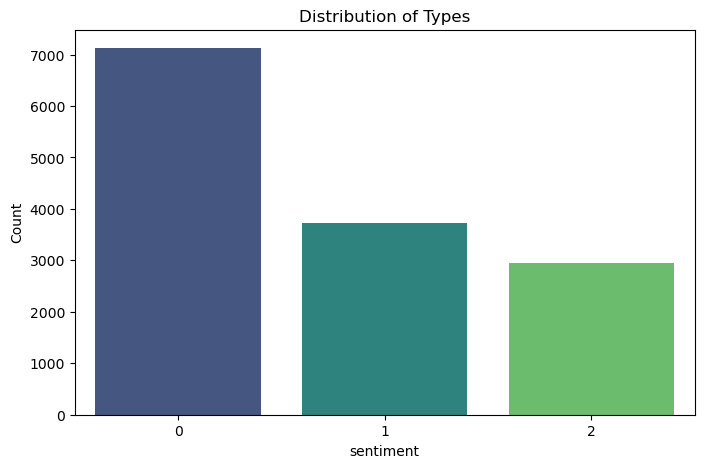

In [390]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

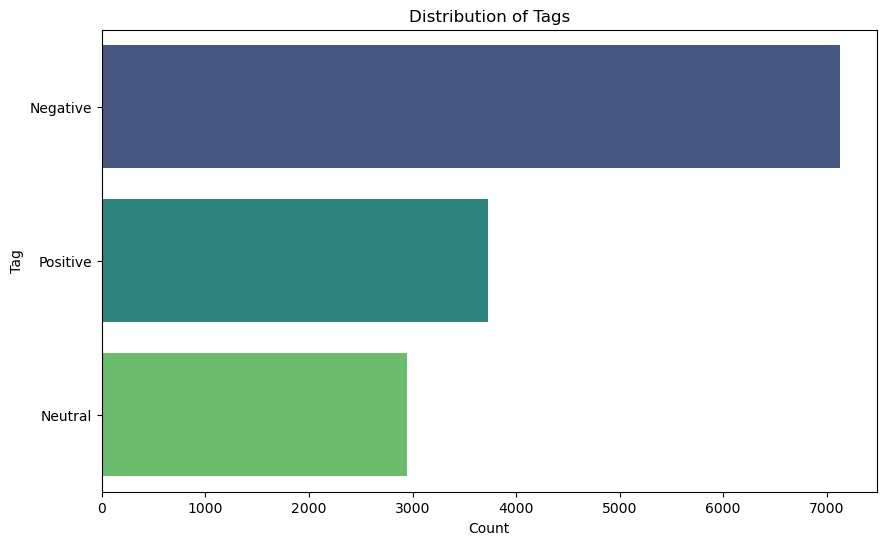

In [391]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tag', data=df, palette='viridis', order=df['Tag'].value_counts().index)
plt.title('Distribution of Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [392]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text=temp.sentiment,
    values=temp.text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

#### Most common WOrds

In [393]:
from collections import Counter

df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,না,2708
1,আর,2388
2,করে,2363
3,এই,2067
4,কি,1945
5,।,1809
6,না।,1296
7,ও,1281
8,করা,1260
9,জন্য,1200


In [401]:
df['temp_list'] = df['text'].apply(lambda x: str(x).split())
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('bengali')]
df['temp_list'] = df['temp_list'].apply(remove_stopword)

In [402]:
# Remove punctuation
def remove_punctuation(temp_list):
    return [re.sub(r'[“”"\'।।.,!?()\[\]{}<>;:।‘’–—…]', '', word) for word in temp_list]

df['temp_list'] = df['temp_list'].apply(remove_punctuation)

#### Most common words after removing stopwords

In [404]:
def remove_space(x):
    return [y for y in x if y != '']
df['temp_list'] = df['temp_list'].apply(remove_space)

In [405]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,না,1969
1,টাকা,1123
2,কথা,920
3,হবে,883
4,দেশের,871
5,হয়ে,783
6,দিয়ে,733
7,যায়,680
8,একটা,664
9,সাথে,650


#### Most common words Sentiments Wise

In [410]:
df.head(5)

,text,Tag,sentiment,temp_list
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,Negative,0,"[লিখার, সময়, পারলে, সত্য, লিখার, অভ্যাস, শিখুন]"
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative,0,"[হচ্ছে, সংশ্লিষ্ট, সকলের, ডিপ্রেশনের, ফলে, সরক..."
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Negative,0,"[দেশের, স্বাভাবিক, অর্থনৈতিক, গতিপ্রবাহকে, বাধ..."
3,চুরি নয় লুটপাট।,Negative,0,"[চুরি, লুটপাট]"
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral,2,"[ইসলামী, ব্যাংকের, বর্তমান, অবস্থা, শাসক, জামা..."


In [406]:
Positive_sent = df[df['Tag']=='Positive']
Negative_sent = df[df['Tag']=='Negative']
Neutral_sent = df[df['Tag']=='Neutral']

In [ ]:
#MosT common Positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,না,470
1,হবে,323
2,ভালো,260
3,দেশের,258
4,কথা,228
5,টাকা,224
6,একটা,202
7,সাথে,201
8,হয়ে,194
9,বাংলাদেশ,189


In [415]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,টাকা,222
2,হবে,195
3,কথা,186
4,দেশের,184
5,হয়ে,171
6,দিয়ে,142
7,যায়,138
8,সাথে,134
9,হয়েছে,131
10,হয়,129


### Look at Unique Words in each Segment

In [419]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [427]:
def words_unique(Tag, numwords, raw_words):
    allother = []
    for item in df[df.Tag != Tag]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Tag == Tag]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    
    return Unique_words

#### Positive

In [429]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,মনটা,7
1,পেপল,7
2,ভালবাসার,7
3,এমএলএম,7
4,বৃত্তি,6
5,বিবেচ্য,6
6,তামিমকে,6
7,ভিজে,5
8,জন,5
9,এসিসিএ,5


#### Negative unique

In [432]:
Unique_Negative= words_unique('Negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,মগের,13
1,হাড়ে,12
2,পোক্ত,11
3,কাস্টমার,10
4,এদিকে,10
5,মানবাধিকার,10
6,আরকি,8
7,চামড়া,8
8,তলা,8
9,ঝুলিয়ে,8


#### Neutral Unique

In [433]:
Unique_Neutral= words_unique('Neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,বরখেলাপ,6
1,মেসেজ,5
2,পাল্টানোর,5
3,হৈ,5
4,এসিস্ট,5
5,মুর্তজা,5
6,এলিট,4
7,মাস্টার্স,4
8,গার্মেণ্টস,4
9,দোভাষী,4


In [435]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 